In [41]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Classificação

#### 1. Aquisição dos dados

In [42]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [43]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(10000,)


In [44]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

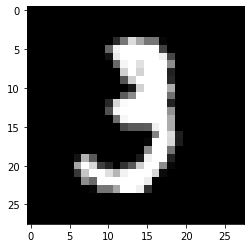

In [45]:
# Escolhendo uma imagem para plotar
sample = 10
image = x_train[sample]

# Plotando a imagem
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

#### 2. Pré-processamento

#### Normalização

In [46]:
# Encontra o valor máximo nos dados de treinamento
m = np.max(x_train)

# Normaliza os dados de treinamento dividindo cada valor pelo valor máximo
x_train = x_train / m

# Normaliza os dados de teste dividindo cada valor pelo mesmo valor máximo dos dados de treinamento
x_test = x_test / m

In [47]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

#### One hot encoder na variável alvo

In [48]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [49]:
# Cria uma instância do OneHotEncoder para realizar a codificação one-hot
hot = OneHotEncoder()

# Ajusta o codificador aos rótulos de treinamento (y_train) e transforma os rótulos em uma matriz one-hot
# reshape(-1, 1) transforma y_train em uma matriz coluna para o OneHotEncoder
# toarray() converte o resultado em um array denso
y_train = hot.fit_transform(y_train.reshape(-1, 1)).toarray()

# Transforma os rótulos de teste (y_test) usando o codificador ajustado e converte em uma matriz one-hot
y_test = hot.transform(y_test.reshape(-1, 1)).toarray()

In [50]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

#### 3. Particionamento de base de dados

In [51]:
from sklearn.model_selection import train_test_split

x_treino, x_val, y_treino, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 13)

x_treino.shape, x_val.shape, x_test.shape, y_treino.shape, y_val.shape, y_test.shape, 

((48000, 28, 28),
 (12000, 28, 28),
 (10000, 28, 28),
 (48000, 10),
 (12000, 10),
 (10000, 10))

In [52]:
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.models import Sequential
from keras.callbacks import EarlyStopping

#### 4. Treinamento - definição de arquitetura
1. Definir quantas camadas são necessárias par o problema
2. A quantidade de neurônios em cada camada
3. A função de ativação de cada camada
4. A função de ativação da saída
* softmax (saída não binária)
* sigmoid (saída binária)

In [53]:
x_treino.shape

(48000, 28, 28)

In [54]:
28 * 28

784

In [55]:
# Criação de um modelo sequencial
rede_simples = Sequential()

# Adiciona uma camada de Flatten para achatar a entrada
rede_simples.add(Flatten())

# Adiciona uma camada densa (fully connected) com 25 neurônios e dimensão de entrada 784
rede_simples.add(Dense(25, input_dim=784))

# Adiciona a função de ativação ReLU à camada anterior
rede_simples.add(Activation('relu'))

# Adiciona outra camada densa com 25 neurônios
rede_simples.add(Dense(25))

# Adiciona a função de ativação ReLU à camada anterior
rede_simples.add(Activation('relu'))

# Adiciona mais uma camada densa com 25 neurônios
rede_simples.add(Dense(25))

# Adiciona a função de ativação ReLU à camada anterior
rede_simples.add(Activation('relu'))

# Adiciona uma camada densa final com 10 neurônios (correspondente ao número de classes)
rede_simples.add(Dense(10))

# Adiciona a função de ativação softmax para a camada de saída
rede_simples.add(Activation('softmax'))

### 5. Definir otimizadores

In [56]:
rede_simples.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics=['accuracy'])

#### 6. Treinamento

1. Adicionar conjuntos de treinamento e validação
2. Determinar a quantidade de épocas

In [57]:
#### 6. Treinamento

historico = rede_simples.fit(x_treino, 
                             y_treino, 
                             epochs = 100, 
                             verbose = 1,
                             validation_data = (x_val, y_val))

Epoch 1/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4160 - accuracy: 0.8763 - val_loss: 0.2490 - val_accuracy: 0.9239
Epoch 2/100
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2058 - accuracy: 0.9382 - val_loss: 0.2009 - val_accuracy: 0.9410
Epoch 3/100
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1672 - accuracy: 0.9502 - val_loss: 0.1721 - val_accuracy: 0.9475
Epoch 4/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1449 - accuracy: 0.9558 - val_loss: 0.1642 - val_accuracy: 0.9536
Epoch 5/100
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1256 - accuracy: 0.9626 - val_loss: 0.1764 - val_accuracy: 0.9477
Epoch 6/100
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1157 - accuracy: 0.9639 - val_loss: 0.1552 - val_accuracy: 0.9553
Epoch 7/100
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1024 - accuracy: 0.9677 - val_loss: 0.1424 - val_ac

##### 7. Avaliação do modelo

In [58]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Faz previsões no conjunto de teste usando o modelo treinado
pred_simples = rede_simples.predict(x_test)

# Calcula a precisão do modelo comparando os rótulos verdadeiros (y_test) com as previsões (pred_simples)
# y_test.argmax(1) retorna os índices das classes verdadeiras
# pred_simples.argmax(1) retorna os índices das classes previstas
accuracy_score(y_test.argmax(1), pred_simples.argmax(1))

313/313 [==============================] - 1s 2ms/step


0.9581

In [59]:
y_test.argmax(1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [60]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [61]:
pred_simples.argmax(1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [62]:
pred_simples[0]

array([1.1494996e-25, 2.1606933e-27, 4.1523852e-23, 2.2562742e-19,
       5.9234407e-26, 3.8840245e-24, 0.0000000e+00, 1.0000000e+00,
       1.1262505e-20, 2.5111122e-17], dtype=float32)

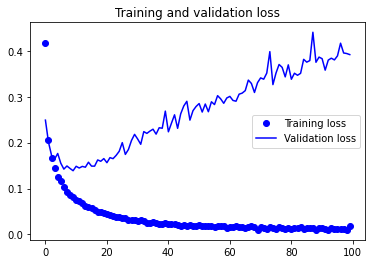

In [63]:
loss = historico.history['loss']
val_loss = historico.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#### 8. Regularização
1. Early Stopping: determinar quando encerrar o treinamento
2. Dropout: selecionar neurônios aleatoriamente para o treinamento

In [64]:
es = EarlyStopping(monitor = 'val_loss', min_delta = 0.001, patience = 10, verbose = 1, mode = 'auto')

# Setamos os pesos iniciais iguais à versão antes do treinamento pra ter um comparativo mais real.
#rede_simples.set_weights(pesos_iniciais)

historico = rede_simples.fit(x_treino, 
                             y_treino, 
                             epochs = 150, 
                             verbose = 1,
                             validation_data = (x_val, y_val),
                             callbacks = [es])

Epoch 1/150
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0095 - accuracy: 0.9969 - val_loss: 0.3942 - val_accuracy: 0.9629
Epoch 2/150
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0081 - accuracy: 0.9973 - val_loss: 0.3769 - val_accuracy: 0.9625
Epoch 3/150
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0127 - accuracy: 0.9960 - val_loss: 0.4299 - val_accuracy: 0.9597
Epoch 4/150
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0128 - accuracy: 0.9960 - val_loss: 0.3774 - val_accuracy: 0.9627
Epoch 5/150
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0137 - accuracy: 0.9962 - val_loss: 0.4031 - val_accuracy: 0.9615
Epoch 6/150
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0093 - accuracy: 0.9972 - val_loss: 0.4057 - val_accuracy: 0.9612
Epoch 7/150
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0129 - accuracy: 0.9963 - val_loss: 0.4491 - val_ac

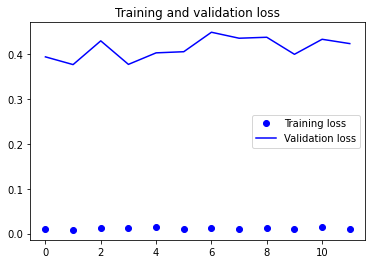

In [65]:
loss = historico.history['loss']
val_loss = historico.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [66]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

pred_es = rede_simples.predict(x_test)

accuracy_score(y_test.argmax(1), pred_es.argmax(1))

313/313 [==============================] - 1s 3ms/step


0.9623

In [67]:
confusion_matrix(y_test.argmax(1), pred_es.argmax(1))

array([[ 963,    0,    2,    2,    2,    1,    6,    3,    1,    0],
       [   0, 1118,    5,    4,    0,    2,    2,    0,    4,    0],
       [   5,    2,  992,    7,    5,    2,    6,    6,    7,    0],
       [   1,    0,    9,  971,    1,    9,    1,    9,    6,    3],
       [   1,    1,    2,    1,  949,    0,    9,    0,    2,   17],
       [   5,    3,    1,   14,    1,  836,   15,    3,    9,    5],
       [   7,    1,    1,    2,    6,    3,  935,    1,    1,    1],
       [   2,    8,   18,    7,    8,    0,    0,  974,    3,    8],
       [   8,    2,    4,   10,    4,    6,    9,    6,  917,    8],
       [   4,    5,    0,    6,    7,    4,    3,    7,    5,  968]],
      dtype=int64)

### Regularização - Dropout

* Alterna quais neurônios vão otimizar os pesos a cada rodada do treinamento

In [68]:
rede_dropout = Sequential()
rede_dropout.add(Flatten())
rede_dropout.add(Dense(25,  input_dim = 784))
rede_dropout.add(Activation('relu'))
rede_dropout.add(Dropout(0.3))
rede_dropout.add(Dense(25))
rede_dropout.add(Activation('relu'))
rede_dropout.add(Dense(25))
rede_dropout.add(Dropout(0.3))
rede_dropout.add(Activation('relu'))
rede_dropout.add(Dense(10))
rede_dropout.add(Activation('softmax'))

rede_dropout.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics=['accuracy'])


In [69]:
historico = rede_dropout.fit(x_treino, 
                             y_treino, 
                             epochs = 150, 
                             verbose = 1,
                             validation_data = (x_val, y_val),
                             callbacks = [es])

Epoch 1/150
1500/1500 [==============================] - 8s 5ms/step - loss: 0.8492 - accuracy: 0.7210 - val_loss: 0.2834 - val_accuracy: 0.9222
Epoch 2/150
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5161 - accuracy: 0.8446 - val_loss: 0.2595 - val_accuracy: 0.9270
Epoch 3/150
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4653 - accuracy: 0.8619 - val_loss: 0.2347 - val_accuracy: 0.9320
Epoch 4/150
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4317 - accuracy: 0.8720 - val_loss: 0.2299 - val_accuracy: 0.9352
Epoch 5/150
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4079 - accuracy: 0.8808 - val_loss: 0.2269 - val_accuracy: 0.9348
Epoch 6/150
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3905 - accuracy: 0.8844 - val_loss: 0.2137 - val_accuracy: 0.9394
Epoch 7/150
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3821 - accuracy: 0.8877 - val_loss: 0.2096 - val_ac

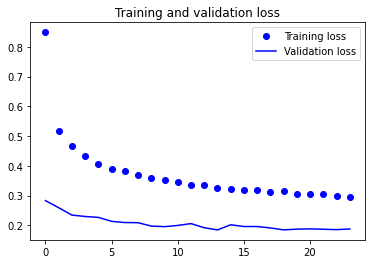

In [70]:
loss = historico.history['loss']
val_loss = historico.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [71]:
pred_dropout = rede_dropout.predict(x_test)

accuracy_score(y_test.argmax(1), pred_dropout.argmax(1))

313/313 [==============================] - 1s 3ms/step


0.9493

In [72]:
confusion_matrix(y_test.argmax(1), pred_dropout.argmax(1))

array([[ 950,    0,    1,    0,    1,    3,   15,    6,    3,    1],
       [   0, 1111,    1,    3,    0,    1,    4,    2,   13,    0],
       [   1,    2,  960,   16,    6,    3,   10,   16,   18,    0],
       [   2,    1,   11,  952,    0,   22,    0,   12,    5,    5],
       [   1,    0,    3,    0,  930,    0,    7,    2,    2,   37],
       [   6,    1,    1,   17,    2,  829,   13,    1,    9,   13],
       [   8,    4,    0,    1,    5,   11,  927,    0,    2,    0],
       [   1,    6,   10,    7,    6,    0,    0,  982,    1,   15],
       [   6,    5,    4,    7,    9,   11,   13,    9,  905,    5],
       [   3,    4,    0,   12,   18,    9,    2,    6,    8,  947]],
      dtype=int64)

# Regressão

In [73]:
(x_train, y_train), (x_test, y_test) = keras.datasets.boston_housing.load_data()

In [74]:
# Calcula a média dos dados de treinamento ao longo do eixo 0 (para cada característica)
mean = x_train.mean(axis=0)

# Subtrai a média dos dados de treinamento para centralizá-los em torno de zero
x_train -= mean

# Calcula o desvio padrão dos dados de treinamento ao longo do eixo 0 (para cada característica)
std = x_train.std(axis=0)

# Divide os dados de treinamento pelo desvio padrão para normalizá-los
x_train /= std

# Subtrai a mesma média dos dados de teste para centralizá-los em torno de zero
x_test -= mean

# Divide os dados de teste pelo mesmo desvio padrão para normalizá-los
x_test /= std

In [75]:
from sklearn.model_selection import train_test_split

x_treino, x_val, y_treino, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 13)

x_treino.shape, x_val.shape, x_test.shape, y_treino.shape, y_val.shape, y_test.shape, 

((323, 13), (81, 13), (102, 13), (323,), (81,), (102,))

In [76]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(x_treino.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])

In [77]:
es = EarlyStopping(monitor = 'val_loss', min_delta = 0.001, patience = 10, verbose = 1, mode = 'auto')

historico = model.fit(x_treino, 
                             y_treino, 
                             epochs = 150, 
                             batch_size=64,
                             verbose = 1,
                             validation_data = (x_val, y_val),
                             callbacks = [es])

Epoch 1/150
6/6 [==============================] - 1s 44ms/step - loss: 572.9531 - mae: 22.2097 - val_loss: 500.1543 - val_mae: 20.2413
Epoch 2/150
6/6 [==============================] - 0s 12ms/step - loss: 523.9325 - mae: 21.1255 - val_loss: 458.5078 - val_mae: 19.2493
Epoch 3/150
6/6 [==============================] - 0s 13ms/step - loss: 478.8898 - mae: 20.1004 - val_loss: 416.1425 - val_mae: 18.1791
Epoch 4/150
6/6 [==============================] - 0s 14ms/step - loss: 432.5567 - mae: 19.0015 - val_loss: 373.1993 - val_mae: 17.0154
Epoch 5/150
6/6 [==============================] - 0s 13ms/step - loss: 385.8578 - mae: 17.7978 - val_loss: 332.1242 - val_mae: 15.8381
Epoch 6/150
6/6 [==============================] - 0s 10ms/step - loss: 340.0725 - mae: 16.5515 - val_loss: 288.0937 - val_mae: 14.4729
Epoch 7/150
6/6 [==============================] - 0s 12ms/step - loss: 292.6257 - mae: 15.1458 - val_loss: 247.2886 - val_mae: 13.1231
Epoch 8/150
6/6 [==============================]

In [78]:
pred_simples = model.predict(x_test)

4/4 [==============================] - 0s 3ms/step


In [79]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, pred_simples)

2.988395960190717

In [80]:
import pandas as pd

resultado = pd.DataFrame()
resultado['y_test'] = y_test
resultado['y_pred'] = pred_simples

resultado

,y_test,y_pred
0,7.2,8.970073
1,18.8,18.915127
2,19.0,21.200138
3,27.0,35.298557
4,22.2,24.693787
...,...,...
97,21.9,51.260399
98,24.1,26.864939
99,50.0,49.092487
100,26.7,32.457397
